In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
from pathlib import Path 

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [247]:
from pathlib import Path

p = Path().cwd()
print(f"original File path: {p}")
stringpath= str(p)[0:str(p).rfind('\\')] + '\\data'
print(f"Updated File Path to pick from Data Library: { stringpath}")
ngsimfile=stringpath + '/' + 'Sample_Cleaned_NGSIM_Data_Part_2.csv'
ngsim = pd.read_csv(ngsimfile,low_memory=False)
print(f"{ngsim.duplicated().sum()} duplicate values have been removed")
ngsim.drop_duplicates(inplace=True)

original File path: c:\Users\neels\car following model\DataDrivenCarFollowing-1\datadrivencarfollowing-v1\scripts
Updated File Path to pick from Data Library: c:\Users\neels\car following model\DataDrivenCarFollowing-1\datadrivencarfollowing-v1\data
0 duplicate values have been removed


In [248]:
ngsim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154804 entries, 0 to 154803
Data columns (total 22 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   id                                           154804 non-null  int64  
 1   Vehicle_ID                                   154804 non-null  int64  
 2   Preceding                                    154804 non-null  int64  
 3   Relative_Time                                154804 non-null  int64  
 4   Global_Time                                  154804 non-null  int64  
 5   Local_X                                      154804 non-null  float64
 6   Local_Y                                      154804 non-null  float64
 7   Global_X                                     154804 non-null  float64
 8   Global_Y                                     154804 non-null  float64
 9   v_length                                     154804 non-nul

In [250]:
ngsim

,id,Vehicle_ID,Preceding,Relative_Time,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,...,v_Acc,Space_Headway,Time_Headway,Location,Preceding_Vehicle_Class,Rear_to_Front_Space_Headway,v_Class_Name,Vehicle_combination,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding
0,11,5,0,1117684841001,1118847860100,4.948,149.178,6451195.587,1873298.132,3.9624,...,0.000000,0.000000,0.00,us-101,NaN,NaN,Car,NaN,0.000000,0.000000
1,44,52,48,1117685817401,1118848836500,42.059,1471.840,6452155.548,1872378.779,4.5720,...,-0.045720,19.028664,1.95,us-101,Car,14.202664,Car,Car-Car,0.606552,-0.045720
2,51,73,67,1117684928901,1118847948000,18.751,1853.192,6452453.921,1872148.756,4.8768,...,-3.413760,45.067728,2.34,us-101,Car,41.156128,Car,Car-Car,1.341120,-2.298192
3,91,6,2,1117685787801,1118848806900,30.783,1083.438,6451870.511,1872642.596,4.7244,...,-0.054864,18.284952,1.72,us-101,Car,13.052552,Car,Car-Car,-0.009144,-0.054864
4,112,41,35,1117684872901,1118847892000,5.515,217.059,6451241.586,1873248.046,4.4196,...,0.000000,38.889432,5.43,us-101,Car,33.961832,Car,Car-Car,-3.093720,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154799,4098686,14,11,1117685780801,1118848799900,8.080,763.707,6451644.802,1872870.288,4.7244,...,0.000000,16.459200,2.70,us-101,Car,11.353800,Car,Car-Car,0.003048,0.118872
154800,4098797,83,76,1117683997501,1118847016600,28.136,720.064,6451624.899,1872861.072,4.7244,...,0.000000,30.324552,1.99,us-101,Car,26.260552,Car,Car-Car,-1.182624,2.200656
154801,4098811,83,90,1117684899701,1118847918800,53.700,339.360,6451294.610,1873126.692,4.7244,...,0.067056,17.023080,1.69,us-101,Car,12.654280,Car,Car-Car,1.572768,-3.346704
154802,4098864,39,32,1117684866701,1118847885800,27.243,107.097,6451150.647,1873314.362,4.7244,...,-0.822960,13.222224,2.67,us-101,Car,8.421624,Car,Car-Car,-0.384048,-0.783336


In [251]:

ngsim["Relative_Time"]= ngsim["Relative_Time"]*0.001
ngsim["Global_Time"]= ngsim["Global_Time"]*0.001

In [252]:
ngsim = ngsim.sort_values(['Relative_Time'], ascending=True)

In [253]:
df = ngsim 

In [254]:
df["Vehicle_ID"]=df["Vehicle_ID"].astype(str)
df["Preceding"]=df["Preceding"].astype(str)
df["LF_pairs"] = df["Vehicle_ID"]+ "_"+df["Preceding"]

In [255]:
df["Time.per.frame"] = 0.1

In [256]:
df_grp = df.groupby(["LF_pairs"])

In [257]:
df_grp

In [258]:
#Time duration per pair of each time frame.
df['Time_duration']= df.groupby(["LF_pairs"], as_index=False).cumcount()*0.1

In [225]:
df.tail()

,Vehicle_ID,Frame_ID,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Class,v_Vel,...,Time_Headway,Location,Relative_Time,Preceding_Vehicle_Class,Rear_to_Front_Space_Headway,v_Class_Name,Vehicle_combination,LF_pairs,Time.per.frame,Time_duration
8654867,1355,5622,1113438127100,18.275,1464.336,6042648.149,2134520.896,3.74904,2,0.515112,...,15.92,i-80,1112275108001,Car,3.518408,Car,Car-Car,1355_1351,0.1,92.1
8654868,1474,5688,1113438133700,5.509,560.412,6042767.840,2133624.549,5.42544,2,13.088112,...,1.73,i-80,1112275114601,Car,18.488152,Car,Car-Car,1474_1468,0.1,63.3
8654869,398,2368,1113437801700,18.903,635.841,6042771.741,2133701.076,4.63296,2,7.351776,...,3.77,i-80,1112274782601,Car,23.271480,Car,Car-Car,398_385,0.1,35.0
8654870,599,875,1113436854400,77.094,621.358,6042831.282,2133693.854,4.66344,2,3.962400,...,0.00,i-80,1112273835301,NaN,NaN,Car,NaN,599_0,0.1,16.1
8654871,2006,6461,1113437413000,73.816,695.035,6042818.859,2133766.666,4.51104,2,3.435096,...,2.26,i-80,1112274393901,Car,3.023616,Car,Car-Car,2006_2009,0.1,47.5


In [260]:
df.columns

Index(['id', 'Vehicle_ID', 'Preceding', 'Relative_Time', 'Global_Time',
       'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Class',
       'v_Vel', 'v_Acc', 'Space_Headway', 'Time_Headway', 'Location',
       'Preceding_Vehicle_Class', 'Rear_to_Front_Space_Headway',
       'v_Class_Name', 'Vehicle_combination',
       'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'LF_pairs',
       'Time.per.frame', 'Time_duration'],
      dtype='object')

In [261]:
df["nextframeAcc"]=df.groupby(["LF_pairs"],as_index=False)["v_Acc"].shift(-1)

In [262]:
df["nextframesvel"]=df.groupby(["LF_pairs"],as_index=False)["v_Vel"].shift(-1)

In [263]:
df["nextframeposition"]=df.groupby(["LF_pairs"],as_index=False)["Local_Y"].shift(-1)

In [264]:
df[df["LF_pairs"]== "2_0"].sort_values(['Relative_Time'], ascending=True)

,id,Vehicle_ID,Preceding,Relative_Time,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,...,v_Class_Name,Vehicle_combination,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,LF_pairs,Time.per.frame,Time_duration,nextframeAcc,nextframesvel,nextframeposition
147831,3957224,2,0,1.117684e+09,1.118847e+09,16.467,35.381,6451137.641,1873344.962,4.4196,...,Car,NaN,12.192000,0.000000,2_0,0.1,0.0,0.00000,12.192000,39.381
119377,3380369,2,0,1.117684e+09,1.118847e+09,16.447,39.381,6451140.329,1873342.000,4.4196,...,Car,NaN,12.192000,0.000000,2_0,0.1,0.1,0.00000,12.192000,43.381
7099,201732,2,0,1.117684e+09,1.118847e+09,16.426,43.381,6451143.018,1873339.038,4.4196,...,Car,NaN,12.192000,0.000000,2_0,0.1,0.2,0.00000,12.192000,47.380
3685,105387,2,0,1.117684e+09,1.118847e+09,16.405,47.380,6451145.706,1873336.077,4.4196,...,Car,NaN,12.192000,0.000000,2_0,0.1,0.3,0.00000,12.192000,51.381
22956,652438,2,0,1.117684e+09,1.118847e+09,16.385,51.381,6451148.395,1873333.115,4.4196,...,Car,NaN,12.192000,0.000000,2_0,0.1,0.4,0.00000,12.192000,55.381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53628,1534610,2,0,1.117686e+09,1.118849e+09,32.732,2146.868,6452675.357,1871945.501,5.1816,...,Car,NaN,10.680192,-0.115824,2_0,0.1,175.3,-0.06096,10.671048,2150.370
146934,3938838,2,0,1.117686e+09,1.118849e+09,32.729,2150.370,6452678.095,1871943.322,5.1816,...,Car,NaN,10.671048,-0.060960,2_0,0.1,175.4,0.00000,10.671048,2153.868
26308,749317,2,0,1.117686e+09,1.118849e+09,32.727,2153.868,6452680.834,1871941.142,5.1816,...,Car,NaN,10.671048,0.000000,2_0,0.1,175.5,0.00000,10.671048,2157.369
39165,1118455,2,0,1.117686e+09,1.118849e+09,32.724,2157.369,6452683.573,1871938.963,5.1816,...,Car,NaN,10.671048,0.000000,2_0,0.1,175.6,0.00000,10.671048,2160.868


In [265]:
def training_pairs(data):
    random.seed(2109)
    pairs = data["LF_pairs"].unique()
    pairs = pairs.tolist()
    v = round(len(pairs)*0.7)
    pairs = random.sample(pairs, v)
    return pairs

In [266]:
training_pairs(df)

['24_14',
 '67_53',
 '37_38',
 '56_37',
 '74_71',
 '49_46',
 '74_53',
 '77_0',
 '80_75',
 '38_32',
 '38_0',
 '99_82',
 '61_50',
 '34_26',
 '48_42',
 '52_53',
 '97_91',
 '18_4',
 '54_46',
 '60_48',
 '85_80',
 '51_40',
 '73_76',
 '49_48',
 '95_77',
 '99_79',
 '44_40',
 '58_60',
 '31_18',
 '4_6',
 '70_0',
 '90_74',
 '63_42',
 '51_0',
 '11_3',
 '86_77',
 '15_2',
 '34_0',
 '35_33',
 '51_34',
 '7_3',
 '5_4',
 '100_82',
 '19_0',
 '61_66',
 '41_35',
 '40_20',
 '96_93',
 '98_94',
 '84_99',
 '77_74',
 '87_99',
 '41_0',
 '83_0',
 '21_8',
 '26_0',
 '8_5',
 '65_63',
 '10_0',
 '50_45',
 '23_0',
 '57_0',
 '73_71',
 '24_0',
 '83_81',
 '81_67',
 '71_53',
 '49_0',
 '37_0',
 '16_0',
 '60_53',
 '80_77',
 '97_96',
 '36_0',
 '80_76',
 '43_39',
 '39_45',
 '28_8',
 '47_40',
 '100_95',
 '26_22',
 '22_0',
 '35_28',
 '82_0',
 '55_50',
 '22_16',
 '60_27',
 '30_27',
 '75_68',
 '26_21',
 '56_51',
 '72_70',
 '42_33',
 '48_43',
 '90_82',
 '23_20',
 '78_75',
 '79_73',
 '53_49',
 '32_0',
 '9_5',
 '30_0',
 '52_0',
 '53_

In [267]:
import random

In [268]:
df.columns

Index(['id', 'Vehicle_ID', 'Preceding', 'Relative_Time', 'Global_Time',
       'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Class',
       'v_Vel', 'v_Acc', 'Space_Headway', 'Time_Headway', 'Location',
       'Preceding_Vehicle_Class', 'Rear_to_Front_Space_Headway',
       'v_Class_Name', 'Vehicle_combination',
       'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'LF_pairs',
       'Time.per.frame', 'Time_duration', 'nextframeAcc', 'nextframesvel',
       'nextframeposition'],
      dtype='object')

In [235]:
#df = df.drop(['nextframeAcc','nextframesvel','nextframeposition'], axis=1)

In [269]:
df["Reaction_time_1.0_acc"]=df.groupby(["LF_pairs"],as_index=False)["v_Acc"].shift(-10)
df["Reaction_time_1.0_position"]=df.groupby(["LF_pairs"],as_index=False)["Local_Y"].shift(-10)
df["Reaction_time_1.0_vel"]=df.groupby(["LF_pairs"],as_index=False)["v_Vel"].shift(-10)

In [270]:
df = df[df["Reaction_time_1.0_acc"].notna()]
#Random Pairs selections
my_pairs=training_pairs(df)
print(len(my_pairs))

356


In [271]:
df.isnull().sum()

id                                                 0
Vehicle_ID                                         0
Preceding                                          0
Relative_Time                                      0
Global_Time                                        0
Local_X                                            0
Local_Y                                            0
Global_X                                           0
Global_Y                                           0
v_length                                           0
v_Class                                            0
v_Vel                                              0
v_Acc                                              0
Space_Headway                                      0
Time_Headway                                       0
Location                                           0
Preceding_Vehicle_Class                        15544
Rear_to_Front_Space_Headway                    15544
v_Class_Name                                  

In [272]:
df = df[df["Preceding_Vehicle_Class"].notna()]

In [273]:
df.isnull().sum()

id                                             0
Vehicle_ID                                     0
Preceding                                      0
Relative_Time                                  0
Global_Time                                    0
Local_X                                        0
Local_Y                                        0
Global_X                                       0
Global_Y                                       0
v_length                                       0
v_Class                                        0
v_Vel                                          0
v_Acc                                          0
Space_Headway                                  0
Time_Headway                                   0
Location                                       0
Preceding_Vehicle_Class                        0
Rear_to_Front_Space_Headway                    0
v_Class_Name                                   0
Vehicle_combination                            0
Velocity Difference_

In [274]:
#Train and Test datasets
data70 = pd.DataFrame()
data30 = pd.DataFrame()

In [275]:
data70 = df[df['LF_pairs'].isin(my_pairs)]

data30 = df[~df['LF_pairs'].isin(my_pairs)]

In [276]:
df.columns

Index(['id', 'Vehicle_ID', 'Preceding', 'Relative_Time', 'Global_Time',
       'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Class',
       'v_Vel', 'v_Acc', 'Space_Headway', 'Time_Headway', 'Location',
       'Preceding_Vehicle_Class', 'Rear_to_Front_Space_Headway',
       'v_Class_Name', 'Vehicle_combination',
       'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'LF_pairs',
       'Time.per.frame', 'Time_duration', 'nextframeAcc', 'nextframesvel',
       'nextframeposition', 'Reaction_time_1.0_acc',
       'Reaction_time_1.0_position', 'Reaction_time_1.0_vel'],
      dtype='object')

In [284]:
X_train = data70[["Rear_to_Front_Space_Headway",'Velocity Difference_Following-Preceding','v_Vel','Acceleration Difference_Following-Preceding',
       'nextframesvel', 'nextframeposition','Time_duration','Vehicle_ID','Local_Y']]
y_train= data70['nextframeAcc']
X_test = data30[["Rear_to_Front_Space_Headway",'Velocity Difference_Following-Preceding','v_Vel','Acceleration Difference_Following-Preceding',
       'nextframesvel', 'nextframeposition','Time_duration','Vehicle_ID','Local_Y']]
y_test= data30['nextframeAcc']

In [278]:
rf = RandomForestRegressor(n_estimators = 150,n_jobs=-1)

In [287]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150, n_jobs=-1)

In [288]:
rf.score(X_train,y_train)

0.9411798989191448

In [289]:
rf.feature_importances_

array([0.06807166, 0.12854003, 0.11409679, 0.36477251, 0.11318439,
       0.05168303, 0.06143558, 0.04842769, 0.04978832])

<BarContainer object of 9 artists>

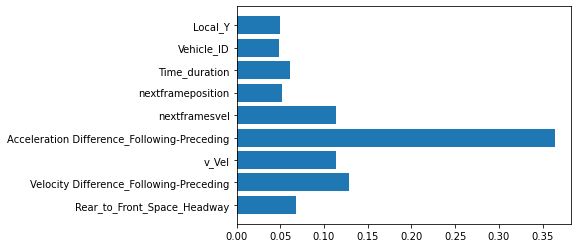

In [290]:
plt.barh(X_train.columns,rf.feature_importances_)

In [291]:
prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

0.8838986997612635
0.9401588694264728


In [107]:
def data_in_parts(data30,rangefrom,rangeto):
    a=data30['LF_pairs'].unique()
    b = a.tolist()
    b = b[rangefrom:rangeto]
    c= len(a)/30
    return c,b 
c, b = data_in_parts(data30,0,100)
print(b)

['13_2', '22_13', '32_26', '35_31', '34_25', '40_34', '47_20', '55_51', '49_37', '74_60', '71_56', '57_49', '37_32', '77_72', '91_82', '10_2', '54_43', '56_44', '96_83', '100_90', '99_91', '48_42', '63_53', '60_48', '74_53', '75_63', '34_31', '64_49', '71_64', '55_34', '51_47', '63_62', '97_82', '76_64', '71_76', '47_37', '96_79', '79_83', '97_78', '9_5', '12_9', '11_7', '15_11', '18_13', '16_6', '26_20', '28_23', '34_26', '32_30', '29_24', '33_29', '52_47', '54_46', '55_43', '62_51', '59_52', '49_59', '60_49', '56_55', '71_53', '69_63', '67_69', '61_66', '10_6', '67_61', '49_45', '50_49', '73_71', '89_81', '87_82', '48_43', '76_61', '67_66', '61_71', '81_76', '54_48', '43_36', '95_90', '52_53', '53_47', '61_50', '44_46', '97_99', '55_44', '80_76', '88_99', '32_29', '15_9', '38_32', '41_38', '21_18', '22_16', '27_22', '25_19', '75_68', '76_70', '85_79', '43_30', '8_1', '84_75']


In [129]:
data70.columns

Index(['id', 'Vehicle_ID', 'Preceding', 'Relative_Time', 'Global_Time',
       'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Class',
       'v_Vel', 'v_Acc', 'Space_Headway', 'Time_Headway', 'Location',
       'Preceding_Vehicle_Class', 'Rear_to_Front_Space_Headway',
       'v_Class_Name', 'Vehicle_combination',
       'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'LF_pairs',
       'Time.per.frame', 'Time_duration', 'Reaction_time_1.0_acc',
       'Reaction_time_1.0_position', 'Reaction_time_1.0_vel'],
      dtype='object')

In [171]:
X_train = data70[[ 'Vehicle_ID', 'Preceding', 'Relative_Time',
       'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Class',
       'v_Vel', 'Space_Headway', 'Time_Headway', 'Rear_to_Front_Space_Headway',
       'Velocity Difference_Following-Preceding','Time_duration']]
       ##'Acceleration Difference_Following-Preceding']]
y_train= data70['v_Acc']

In [172]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, n_jobs=-1)

<BarContainer object of 15 artists>

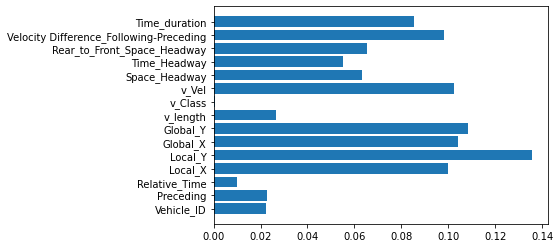

In [173]:
plt.barh(X_train.columns,rf.feature_importances_)

In [174]:
y_test = data30["v_Acc"]

In [175]:
X_test = data30[[ 'Vehicle_ID', 'Preceding', 'Relative_Time',
       'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Class',
       'v_Vel', 'Space_Headway', 'Time_Headway', 'Rear_to_Front_Space_Headway',
       'Velocity Difference_Following-Preceding','Time_duration']]
       ##'Acceleration Difference_Following-Preceding']]
prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

1.5416757915005284
1.2416423766530074


In [138]:
from sklearn.metrics import mean_squared_error

In [178]:
X_train = data70[[ 'Vehicle_ID', 'Preceding', 'Relative_Time',
       'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length','Time_duration', 'v_Class', 'Space_Headway', 'Time_Headway', 'Rear_to_Front_Space_Headway','Time_duration']]
       ##'Acceleration Difference_Following-Preceding']]
y_train= data70['v_Vel']

In [179]:
X_test = data30[[ 'Vehicle_ID', 'Preceding', 'Relative_Time',
       'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Class', 'Space_Headway', 'Time_Headway', 'Rear_to_Front_Space_Headway','Time_duration']]
       ##'Acceleration Difference_Following-Preceding']]
y_test= data30['v_Vel']

In [180]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, n_jobs=-1)

<BarContainer object of 14 artists>

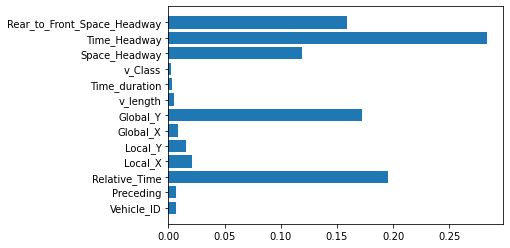

In [181]:
plt.barh(X_train.columns,rf.feature_importances_)

In [182]:
prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

ValueError: X has 13 features, but RandomForestRegressor is expecting 14 features as input.

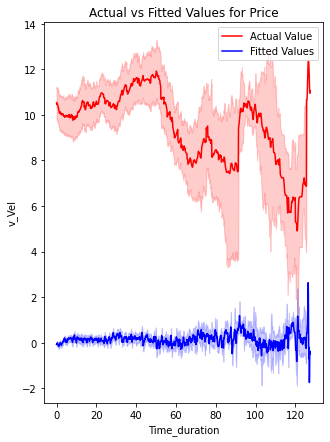

In [183]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.lineplot(x=data30["Time_duration"], y = y_test, color="r", label="Actual Value")
sns.lineplot(x=data30["Time_duration"], y =prediction,  color="b", label="Fitted Values" )


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

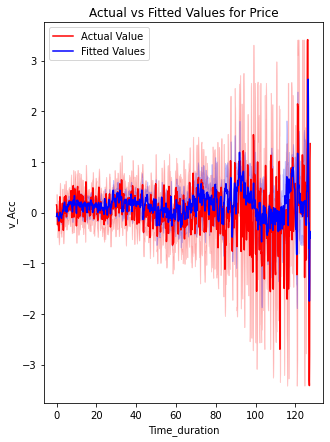

In [176]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.lineplot(x=data30["Time_duration"], y = y_test, color="r", label="Actual Value")
sns.lineplot(x=data30["Time_duration"], y =prediction,  color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

NameError: name 'oob_baseline' is not defined